In [15]:
import squidpy
import pandas as pd
import scanpy

In [2]:
adata = scanpy.read_h5ad('data/skin_processed_human_name.h5ad')

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
signaling_pathways_hvgs = pd.read_csv('results/LR_signaling_clusters.csv', index_col=0)

In [17]:
interactions = signaling_pathways_hvgs[['ligand', 'receptor']]
interactions.columns = ['source', 'target']

In [18]:
squidpy.gr.ligrec(adata, 'cell_types', use_raw=False, interactions=interactions, gene_symbols='symbol')

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [19]:
genes_of_interest = [['CCL5', 'CCR5'], ['CD274', 'PDCD1']]

In [20]:
adata_subset = adata.copy()
adata_subset.uns['cell_types_ligrec']['means'] = adata.uns['cell_types_ligrec']['means'].loc[genes_of_interest]
adata_subset.uns['cell_types_ligrec']['pvalues'] = adata.uns['cell_types_ligrec']['pvalues'].loc[genes_of_interest]
adata_subset.uns['cell_types_ligrec']['metadata'] = adata.uns['cell_types_ligrec']['metadata'].loc[genes_of_interest]

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [21]:
scanpy.set_figure_params(dpi_save=500)

In [22]:
adata_subset.uns['cell_types_ligrec']['pvalues']

cluster_1     epithelial                            fibroblasts              \
cluster_2     epithelial fibroblasts myeloid tcells  epithelial fibroblasts   
source target                                                                 
CCL5   CCR5          1.0         NaN     1.0    1.0         1.0         NaN   
CD274  PDCD1         NaN         NaN     1.0    0.0         NaN         NaN   

cluster_1                       myeloid                                tcells  \
cluster_2     myeloid tcells epithelial fibroblasts myeloid tcells epithelial   
source target                                                                   
CCL5   CCR5       1.0    1.0        0.0         NaN     0.0    0.0        0.0   
CD274  PDCD1      1.0    0.0        NaN         NaN     0.0    0.0        NaN   

cluster_1                                 
cluster_2     fibroblasts myeloid tcells  
source target                             
CCL5   CCR5           NaN     0.0    0.0  
CD274  PDCD1          NaN     1.0    0.0

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


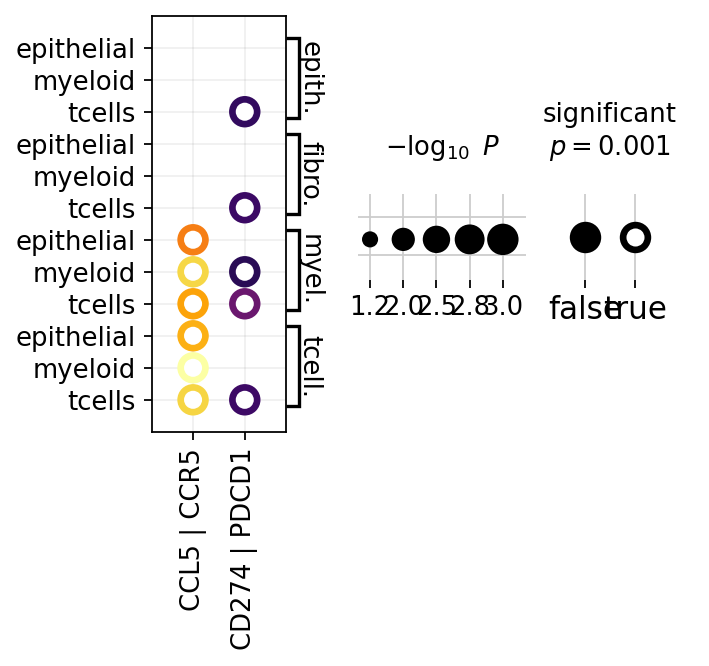

In [23]:
squidpy.pl.ligrec(adata_subset, 'cell_types', swap_axes=True, show_colorbar=False, cmap='inferno',
                  figsize=(3,3), title='', save='permutation_test.png')